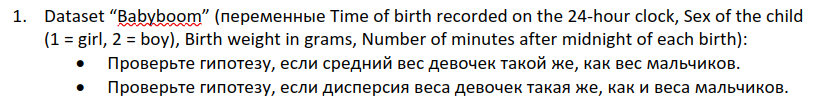

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

cols = ['Time of birth', 'Sex', 'weight', 'Minutes after midnight']
df = pd.read_fwf('datasets/babyboom.dat.txt', header=None, widths=[8, 11, 8, 8], names=cols)

df.head()

,Time of birth,Sex,weight,Minutes after midnight
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


In [2]:
dfd = df.loc[(df['Sex'] == 1)]
dfm = df.loc[(df['Sex'] == 2)]

#### Проверка гипотезы о том, что средний вес девочек = среднему весу мальчиков

##### Критерий Стьюдента (T-test)
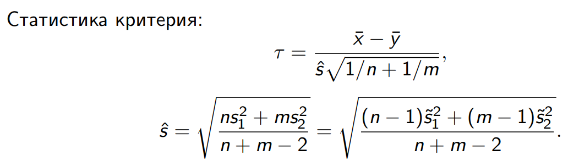

In [3]:
st.ttest_ind(dfd['weight'], dfm['weight'])

TtestResult(statistic=-1.5228564442562815, pvalue=0.1352891891054555, df=42.0)

гипотеза подтвердилась

#### Проверка гипотезы о том, что дисперсия веса Д и М одинаковая
##### (F-test)
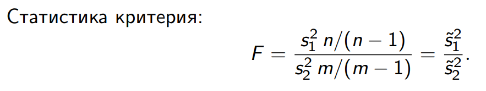

In [4]:
def f_test(x, y):
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn_ = x.size-1 #define degrees of freedom numerator 
    dfd_ = y.size-1 #define degrees of freedom denominator 
    p = 1-st.f.cdf(f, dfn_, dfd_) #find p-value of F test statistic 
    return f, p

f_test(dfm['weight'], dfd['weight'])
#st.levene(dfd['weight'], dfm['weight'])

(0.45932572243558406, 0.9623686904285751)

гипотеза подтвердилась